## Logistic Regression Classifier

**Karina Huang, Lipika Ramaswamy**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('../qii_analysis/')
from qii_analysis import QII
os.chdir('../models/')
pd.set_option('display.max_columns', 500)

#import qii package
from qii_analysis import QII

In [2]:
data = pd.read_csv('../data/data_final.csv', index_col = ['Unnamed: 0'])
#check data
data.head()

,id,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid
0,1,Male,69,Other,0,0,0,0,1,Low,0,1,Low,0,0
1,3,Male,34,African-American,0,0,0,0,3,Low,1,1,Low,1,1
2,4,Male,24,African-American,0,0,1,4,4,Low,1,3,Low,0,1
3,5,Male,23,African-American,0,1,0,1,8,High,0,6,Medium,0,0
4,6,Male,43,Other,0,0,0,2,1,Low,0,1,Low,0,0


In [3]:
#get dummy variables
data_new = pd.get_dummies(data, columns = ['sex', 'race'])

In [4]:
#set predictor and response columns
predictors = ['age', 'juv_misd_count', 'priors_count', 'sex_Female', 
              'sex_Male', 'race_African-American', 'race_Asian', 
              'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']
# genR = ['decile_score']
genR = ['score_text']
# vR = ['v_decile_score']
vR = ['v_score_text']

In [5]:
#train test split data 
train, test = train_test_split(data_new, test_size = 0.20, random_state = 221)

#get QII object
DT_QII_violence = QII(train, test, predictors, vR)

#get models
DT_QII_violence.getModel('Logistic Regression')

In [6]:
#get prediction accuracies
DT_QII_violence.getAccuracy(training = False)
DT_QII_violence.getAccuracy(training = True)

Test Prediction Accuracy:  0.7331947331947332
Training Prediction Accuracy:  0.7244844914226304


In [7]:
#get f1 scores
DT_QII_violence.getF1(training = False)
DT_QII_violence.getF1(training = True)

Test F1 Score:  0.7905109954134039
Training F1 Score:  0.7808070930748116


## I. Unary QII for Individual Outcomes

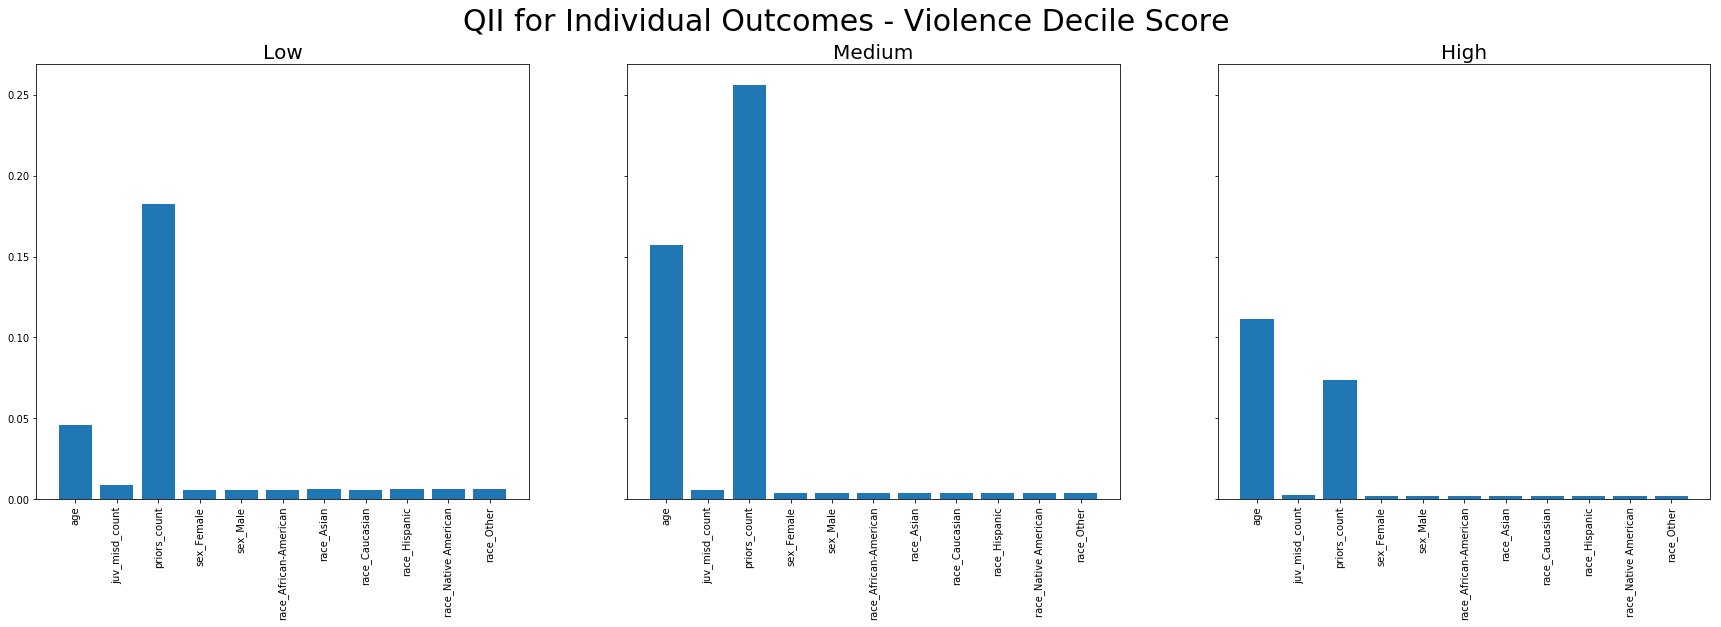

In [8]:
#unary qii influence of individual outcomes by feature and decile score category
genLow, genMed, genHigh = DT_QII_violence.getUnaryInd()
#general decile score
genHist = [genLow, genMed, genHigh]
cat = ['Low', 'Medium', 'High']
fig1, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(genLow)), genHist[i])
    ax.set_xticks(range(len(predictors)))
    ax.set_xticklabels(predictors, rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('QII for Individual Outcomes - Violence Decile Score', fontsize = 30)
plt.show()

## II. Unary QII for Group Disparity

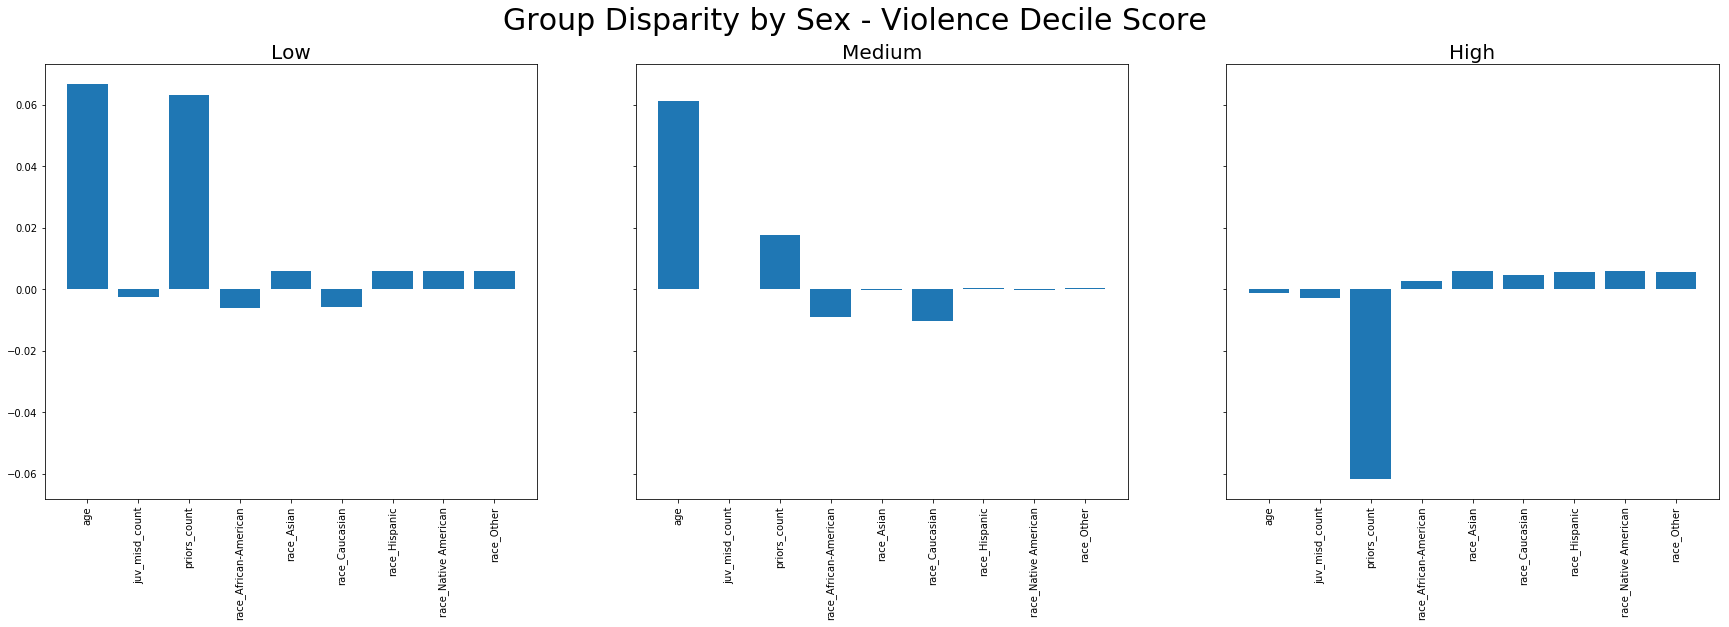

In [9]:
#group disparity by sex - violence decile score
sexLowG_v, sexMediumG_v, sexHighG_v, sexLabels_v = DT_QII_violence.getUnaryGrp('sex', 'sex_Male')
#visualization
sexHistG_v = [sexLowG_v, sexMediumG_v, sexHighG_v]
fig4, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(sexLabels_v)), sexHistG_v[i])
    ax.set_xticks(range(len(sexLabels_v)))
    ax.set_xticklabels(sexLabels_v , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Sex - Violence Decile Score', fontsize = 30)
plt.show()

In [10]:
#group disparity by race-Caucasian - violence decile score
raceLowG_C_v, raceMediumG_C_v, raceHighG_C_v, raceLabels_C_v = DT_QII_violence.getUnaryGrp('race', 'race_Caucasian')

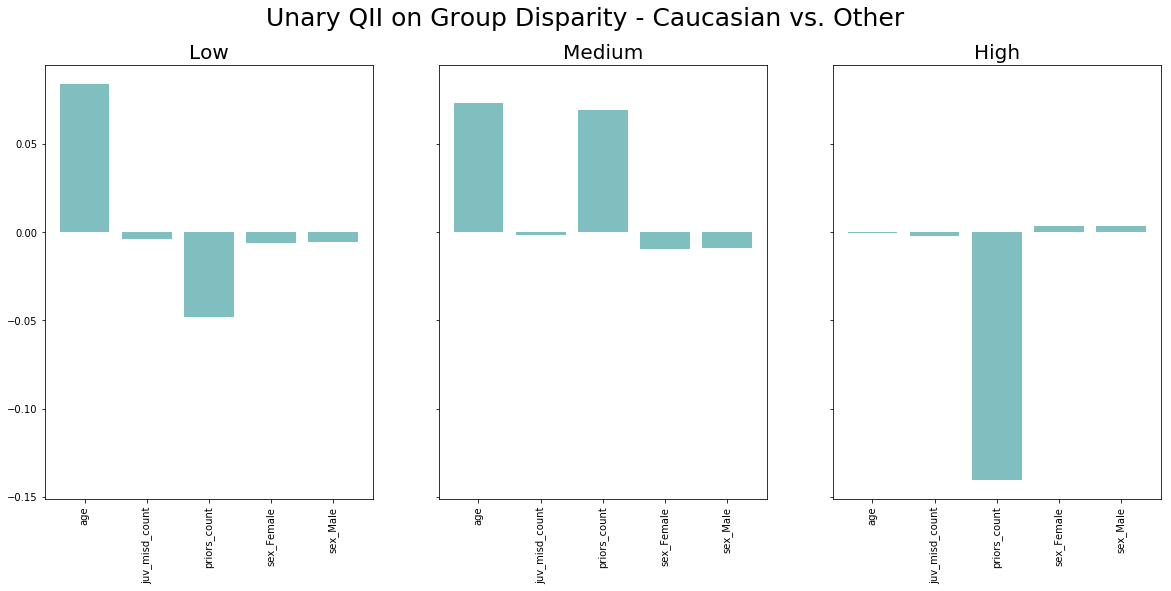

In [11]:
#visualization
raceHistG_C_v = [raceLowG_C_v, raceMediumG_C_v, raceHighG_C_v]
fig5, axes = plt.subplots(1, 3, figsize = (20, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(raceLabels_C_v)), raceHistG_C_v[i], color = 'teal', alpha = 0.5)
    ax.set_xticks(range(len(raceLabels_C_v)))
    ax.set_xticklabels(raceLabels_C_v , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Unary QII on Group Disparity - Caucasian vs. Other', fontsize = 25)
plt.show()

In [12]:
plot_caucasian = pd.DataFrame(raceHistG_C_v).T
raceLabels_C_v_full = ['Age', 'Juvenile\nMisdemeanor Count', 'Priors Count', 'Female', 'Male']
plot_caucasian.columns = ['Low', 'Medium', 'High']

''

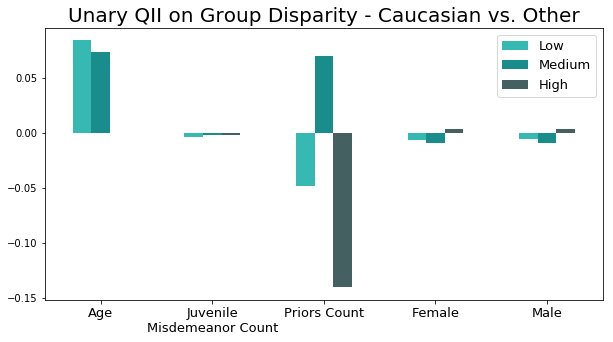

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
plot_caucasian.plot.bar(ax = ax, color = ['lightseagreen','teal', 'darkslategrey' ], alpha = 0.9)
ax.set_xticklabels(rotation = 0, labels = raceLabels_C_v_full, fontsize = 13)
ax.set_title('Unary QII on Group Disparity - Caucasian vs. Other', fontsize = 20)
ax.legend(fontsize = 13)
fig.savefig('unaryQIIgroup.png', dpi = 300)
;

## II. Set QII - Shapley

In [14]:
#transparency report demo
varList = ['juv_misd_count', 'priors_count', 'race_African-American', 'age' , 'sex_Female']
idx158 = DT_QII_violence.getSetQII(158, varList)

In [16]:
idx158

{'juv_misd_count': 0.025738888888888922,
 'priors_count': 0.031433333333333376,
 'race_African-American': 0.025283333333333366,
 'age': 0.02619444444444448,
 'sex_Female': 0.028016666666666704}

''

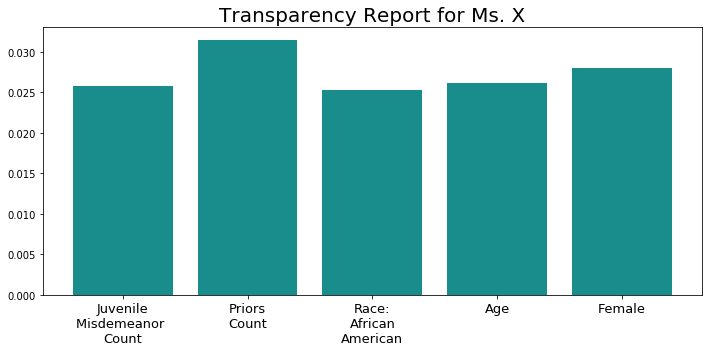

In [17]:
plot_marginal = pd.DataFrame([idx158.keys(), idx158.values()]).T
plot_marginal.columns = ['Input','QII']
plt.figure(figsize = (10,5))
plt.bar(x = plot_marginal.Input, height = plot_marginal.QII, color = 'teal', alpha = 0.9)
plt.xticks(ticks = range(5), labels = ['Juvenile\nMisdemeanor \nCount','Priors\nCount',
                                      'Race:\nAfrican\nAmerican', 'Age', 'Female'], fontsize = 13)
# plt.yticks(ticks = list(np.arange(0.15, 0.22, 0.02)),fontsize = 13)
# plt.ylim((0.15, 0.21), )

plt.title('Transparency Report for Ms. X', fontsize = 20)
plt.tight_layout()
plt.savefig('marginalQIImsX.png', dpi = 300)
;